In [227]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [228]:
import pandas as pd
from pandas import *
import scipy.stats as st
import seaborn as sb
from matplotlib import pyplot as plt
import math
import numpy as np
from scipy.stats import norm, kstest
from scipy.stats import shapiro
from scipy.stats import lognorm
import scipy.stats as stats

In [229]:
df = read_csv("/content/drive/MyDrive/data/weight-height.csv")

In [230]:
df.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

Посмотрим на наш DataFrame

In [231]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Мы видим что данные предоставленны не в метрической системе, а в дюймах и фунтах. Исправим систему измерений.

In [232]:
df['Height'] *= 2.54
df['Weight'] /= 2.205

# Проверьте нормальность распределения роста и веса отдельных полов, проверку необходимо выполнить как графически так и математически.

* Разделим DataFrame по половому признаку

In [233]:
df_woman=df[df["Gender"]=="Female"]
df_man=df[df["Gender"]=="Male"]

In [234]:
df_woman

,Gender,Height,Weight
5000,Female,149.633259,46.298561
5001,Female,165.684232,64.084273
5002,Female,160.957270,59.429208
5003,Female,163.779193,58.127669
5004,Female,156.954464,58.857781
...,...,...,...
9995,Female,168.078536,62.030591
9996,Female,170.350573,77.491114
9997,Female,162.224700,58.265451
9998,Female,175.346978,74.309506


In [235]:
df_woman.describe()

,Height,Weight
count,5000.000000,5000.000000
mean,161.820285,61.614555
std,6.848561,8.626970
min,137.828359,29.342461
25%,157.211881,55.752425
50%,161.876547,61.731330
75%,166.531456,67.487948
max,186.409548,91.717557


<ipython-input-236-716553f9363e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df_woman['Height'])
<ipython-input-236-716553f9363e>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df_woman['Weight'])


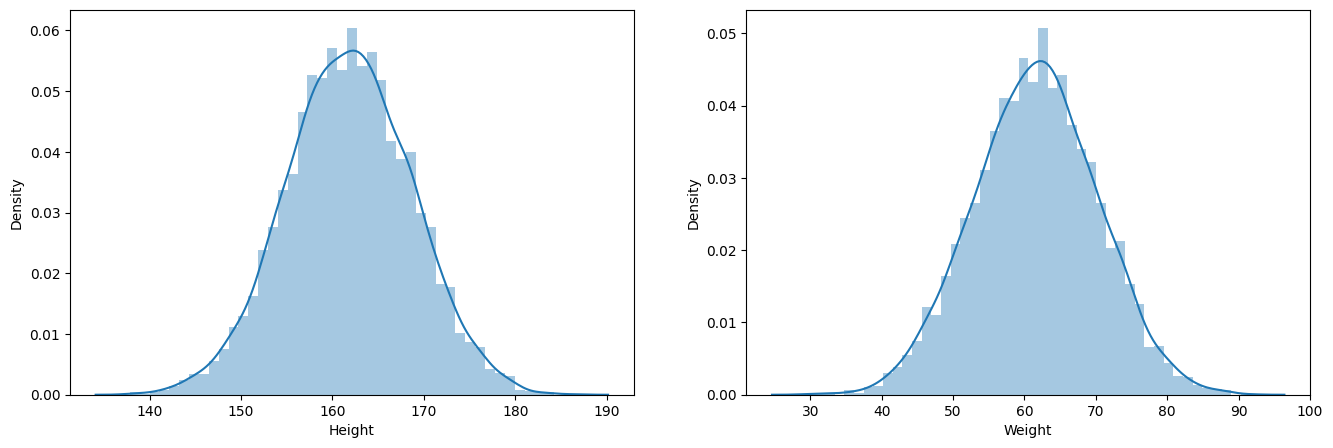

In [236]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sb.distplot(df_woman['Height'])

plt.subplot(1,2,2)
sb.distplot(df_woman['Weight'])

plt.show()

выполним тест Шапиро-Уилка и Колмогорова-Смирнова

In [237]:
#выполним тест Шапиро-Уилка на нормальность
print("тест Шапиро-Уилка на нормальность для роста", shapiro(df_woman['Height']))
print("тест Шапиро-Уилка на нормальность для веса", shapiro(df_woman['Weight']))


тест Шапиро-Уилка на нормальность для роста ShapiroResult(statistic=0.9997759461402893, pvalue=0.9047888517379761)
тест Шапиро-Уилка на нормальность для веса ShapiroResult(statistic=0.9997825622558594, pvalue=0.9174095392227173)


Из полученных данных  мы видим, что тестовая статистика равна 0,999 , а значение p больше  0.05, соответственно мы подтверждаем нулевую гипотезу теста Шапиро-Уилка.

In [238]:
#выполним тест Колмогорова-Смирнова на нормальность
print("тест Колмогорова-Смирнова на нормальность для роста", kstest(df_woman['Height'], 'norm'))
print("тест Колмогорова-Смирнова на нормальность для веса", kstest(df_woman['Weight'], 'norm'))


тест Колмогорова-Смирнова на нормальность для роста KstestResult(statistic=1.0, pvalue=0.0, statistic_location=137.82835864574665, statistic_sign=-1)
тест Колмогорова-Смирнова на нормальность для веса KstestResult(statistic=1.0, pvalue=0.0, statistic_location=29.342461094219047, statistic_sign=-1)


Из полученных данных мы видим, что статистика теста равна 1 , а соответствующее значение p равно 0,0.

Ввиду того что p-значение имеет всего 2 знака после запятой мы не можем ни подтвердить ни опровергнцть нулевую гипотезу теста Колмогорова-Смирнова.

**Вывод: Рост и вес в данных о женщинах распределен равномерно, на графике есть незначительные отклонения в данных Height справа и слева**

In [239]:
df_man

,Gender,Height,Weight
0,Male,187.571423,109.702296
1,Male,174.706036,73.610192
2,Male,188.239668,96.481114
3,Male,182.196685,99.792504
4,Male,177.499761,93.582676
...,...,...,...
4995,Male,174.904559,80.331543
4996,Male,175.192494,72.238199
4997,Male,170.215039,90.338050
4998,Male,181.756605,84.311070


In [240]:
df_man.describe()

,Height,Weight
count,5000.000000,5000.000000
mean,175.326919,84.816608
std,7.272940,8.971045
min,148.353539,51.203147
25%,170.623685,78.860665
50%,175.330380,84.822470
75%,180.311409,90.865216
max,200.656806,122.444308


<ipython-input-241-2b1f116c286a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df_man['Height'])
<ipython-input-241-2b1f116c286a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df_man['Weight'])


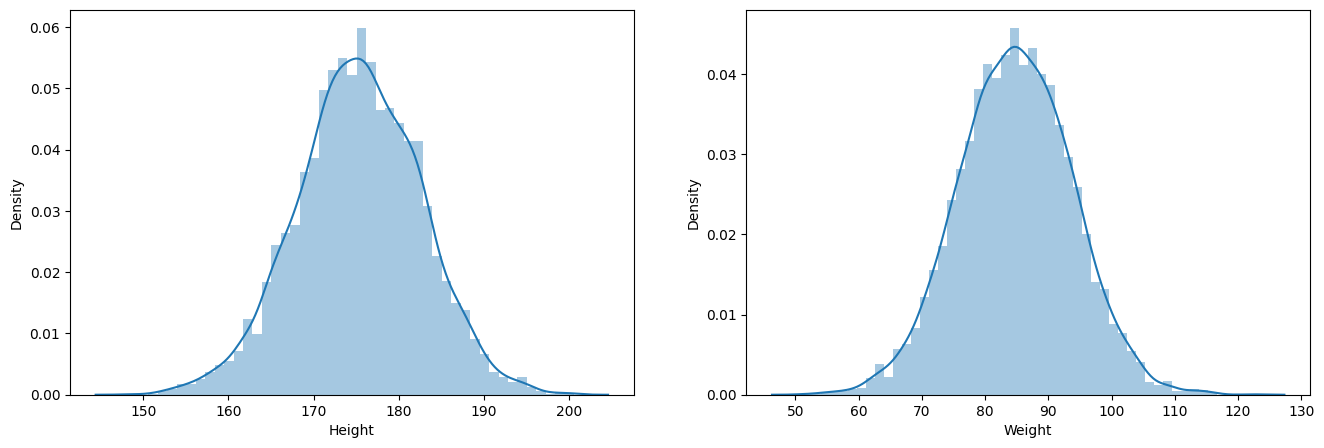

In [241]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sb.distplot(df_man['Height'])

plt.subplot(1,2,2)
sb.distplot(df_man['Weight'])

plt.show()

In [242]:
#выполним тест Шапиро-Уилка на нормальность
print("тест Шапиро-Уилка на нормальность для роста", shapiro(df_man['Height']))
print("тест Шапиро-Уилка на нормальность для веса", shapiro(df_man['Weight']))

тест Шапиро-Уилка на нормальность для роста ShapiroResult(statistic=0.999444842338562, pvalue=0.14202836155891418)
тест Шапиро-Уилка на нормальность для веса ShapiroResult(statistic=0.9995891451835632, pvalue=0.38920748233795166)


Из полученных данных  мы видим, что тестовая статистика равна 0,999 , а значение p больше  0.05, соответственно мы подтверждаем нулевую гипотезу теста Шапиро-Уилка.

In [243]:
#выполним тест Колмогорова-Смирнова на нормальность
print("тест Колмогорова-Смирнова на нормальность для роста", kstest(df_man['Height'], 'norm'))
print("тест Колмогорова-Смирнова на нормальность для веса", kstest(df_man['Weight'], 'norm'))

тест Колмогорова-Смирнова на нормальность для роста KstestResult(statistic=1.0, pvalue=0.0, statistic_location=148.35353852664448, statistic_sign=-1)
тест Колмогорова-Смирнова на нормальность для веса KstestResult(statistic=1.0, pvalue=0.0, statistic_location=51.203147141867575, statistic_sign=-1)


Из полученных данных мы видим, что статистика теста равна 1 , а соответствующее значение p равно 0,0.

Ввиду того что p-значение имеет всего 2 знака после запятой мы не можем ни подтвердить ни опровергнцть нулевую гипотезу теста Колмогорова-Смирнова.

**Вывод: Рост и вес в данных о мужчинах распределен равномерно, на графике есть незначительные отклонения в данных Height справа и слева**

# **Построить тепловую диаграмму корреляции роста и веса для обоих полов (суммароно четыре столбца)**

In [244]:
df_man.rename(columns = {'Height':' Height_man', 'Weight':'Weight_man'}, inplace = True )
df_woman.rename(columns = {'Height':' Height_woman', 'Weight':'Weight_woman'}, inplace = True )

<ipython-input-244-6c1e7f52cb3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_man.rename(columns = {'Height':' Height_man', 'Weight':'Weight_man'}, inplace = True )
<ipython-input-244-6c1e7f52cb3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_woman.rename(columns = {'Height':' Height_woman', 'Weight':'Weight_woman'}, inplace = True )


In [245]:
df_man

,Gender,Height_man,Weight_man
0,Male,187.571423,109.702296
1,Male,174.706036,73.610192
2,Male,188.239668,96.481114
3,Male,182.196685,99.792504
4,Male,177.499761,93.582676
...,...,...,...
4995,Male,174.904559,80.331543
4996,Male,175.192494,72.238199
4997,Male,170.215039,90.338050
4998,Male,181.756605,84.311070


In [246]:
df_woman


,Gender,Height_woman,Weight_woman
5000,Female,149.633259,46.298561
5001,Female,165.684232,64.084273
5002,Female,160.957270,59.429208
5003,Female,163.779193,58.127669
5004,Female,156.954464,58.857781
...,...,...,...
9995,Female,168.078536,62.030591
9996,Female,170.350573,77.491114
9997,Female,162.224700,58.265451
9998,Female,175.346978,74.309506


**Удалим ненужные столбцы из 2-х DataFrame**

In [247]:
del df_man["Gender"]
df_woman

,Gender,Height_woman,Weight_woman
5000,Female,149.633259,46.298561
5001,Female,165.684232,64.084273
5002,Female,160.957270,59.429208
5003,Female,163.779193,58.127669
5004,Female,156.954464,58.857781
...,...,...,...
9995,Female,168.078536,62.030591
9996,Female,170.350573,77.491114
9997,Female,162.224700,58.265451
9998,Female,175.346978,74.309506


In [248]:
df_woman.reset_index(drop=True, inplace=True)

In [249]:
del df_woman["Gender"]
df_woman

,Height_woman,Weight_woman
0,149.633259,46.298561
1,165.684232,64.084273
2,160.957270,59.429208
3,163.779193,58.127669
4,156.954464,58.857781
...,...,...
4995,168.078536,62.030591
4996,170.350573,77.491114
4997,162.224700,58.265451
4998,175.346978,74.309506


Объединим 2 DataFrame

In [250]:
df_H_W = pd.concat([df_man, df_woman], axis=1)
df_H_W

,Height_man,Weight_man,Height_woman,Weight_woman
0,187.571423,109.702296,149.633259,46.298561
1,174.706036,73.610192,165.684232,64.084273
2,188.239668,96.481114,160.957270,59.429208
3,182.196685,99.792504,163.779193,58.127669
4,177.499761,93.582676,156.954464,58.857781
...,...,...,...,...
4995,174.904559,80.331543,168.078536,62.030591
4996,175.192494,72.238199,170.350573,77.491114
4997,170.215039,90.338050,162.224700,58.265451
4998,181.756605,84.311070,175.346978,74.309506


In [251]:
df_H_W.corr()

,Height_man,Weight_man,Height_woman,Weight_woman
Height_man,1.000000,0.862979,-0.032549,-0.020158
Weight_man,0.862979,1.000000,-0.031601,-0.019590
Height_woman,-0.032549,-0.031601,1.000000,0.849609
Weight_woman,-0.020158,-0.019590,0.849609,1.000000


<Axes: >

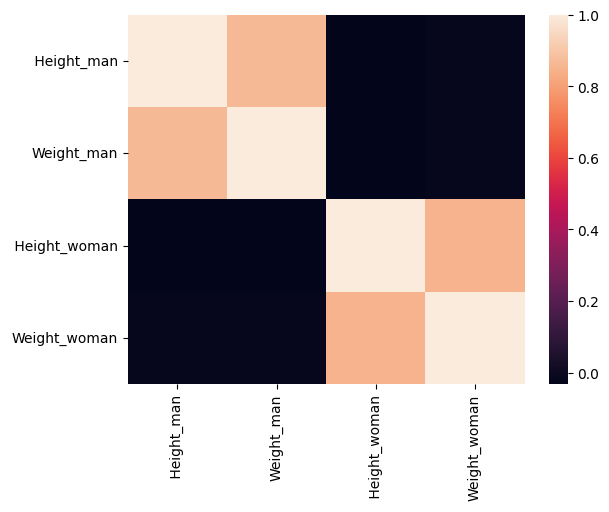

In [252]:
from seaborn.matrix import heatmap
heatmap(df_H_W.corr())

# Вывод: корреляция между признаками веса и роста (в своей гендерной группе) есть, между гендерными группами (признаки веса и роста) корреляции нет.

# Самостоятельно найти любой источник информации о среднем росте мужчин и женщин, провести проверку с использованием одновыборочного t критерия. (обязательно укажите источник в комментариях)

Используя поиск находим страницу:
https://viascio.ru/новости/средний-рост-человека-в-россии-в-2023-году

где говориться:
По последним данным, в 2022 году средний рост мужчин в России составил 176.2 см, а средний рост женщин — 164.7 см.

In [259]:
df_H_W

,Height_man,Weight_man,Height_woman,Weight_woman
0,187.571423,109.702296,149.633259,46.298561
1,174.706036,73.610192,165.684232,64.084273
2,188.239668,96.481114,160.957270,59.429208
3,182.196685,99.792504,163.779193,58.127669
4,177.499761,93.582676,156.954464,58.857781
...,...,...,...,...
4995,174.904559,80.331543,168.078536,62.030591
4996,175.192494,72.238199,170.350573,77.491114
4997,170.215039,90.338050,162.224700,58.265451
4998,181.756605,84.311070,175.346978,74.309506


In [269]:
df_H_W.describe()

,Height_man,Weight_man,Height_woman,Weight_woman
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,175.326919,84.816608,161.820285,61.614555
std,7.272940,8.971045,6.848561,8.626970
min,148.353539,51.203147,137.828359,29.342461
25%,170.623685,78.860665,157.211881,55.752425
50%,175.330380,84.822470,161.876547,61.731330
75%,180.311409,90.865216,166.531456,67.487948
max,200.656806,122.444308,186.409548,91.717557


Выполним  одновыборочный тест  t критерия.

In [267]:
Height_man=df[df['Gender']=="Male"]
Height_woman=df[df['Gender']=="Female"]

Для мужчин

In [265]:
stats.ttest_1samp (a=Height_man["Height"], popmean= 176.2)

TtestResult(statistic=-8.48847607762035, pvalue=2.726967949665824e-17, df=4999)

Для женщин

In [268]:
stats.ttest_1samp (a=Height_woman["Height"], popmean= 164.7)

TtestResult(statistic=-29.732755813770503, pvalue=5.0448363985487275e-179, df=4999)

# Вывод: Поскольку p-значение в обоих случаях меньше 0.05, мы отклоняем нулевую гипотезу t-критерия и делаем вывод, что среднее значение выборки было меньше гипотетического среднего. Однако необходимо учесть что данные в DataFrame собирались в другой стране, а жители России в большенстве случаев выше жителей других стран.